<a href="https://colab.research.google.com/github/kondjiri/Deep-Learning-Series-in-Keras/blob/main/Convolutional_Neural_Network_CNN_Using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [ ]:
data=input_data.read_data_sets('data/fashion',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/fashion/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

In [ ]:
print("Training set (images) shape: {shape}".format(shape=data.train.images.shape))
print("Training set (labels) shape: {shape}".format(shape=data.train.labels.shape))

Training set (images) shape: (55000, 784)
Training set (labels) shape: (55000, 10)


In [ ]:
print("Testing set (images) shape: {}".format(data.test.images.shape))
print("Testing set (labels) shape: {}".format(data.test.labels.shape))

Testing set (images) shape: (10000, 784)
Testing set (labels) shape: (10000, 10)


In [ ]:
# Creating a dictionnary  of target variables classes

label_dict={
  0: 'T-shirt/top',
  1: 'Trouser',
  2: 'Pullover',
  3: 'Dress',
  4: 'Coat',
  5: 'Sandal',
  6: 'Shirt',
  7: 'Sneaker',
  8: 'Bag',
  9: 'Ankle boot'
}

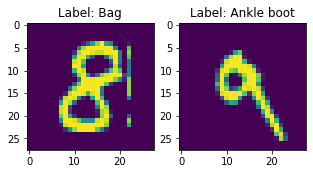

In [ ]:
plt.figure(figsize=([5,5]))


plt.subplot(121)

curr_img = np.reshape(data.train.images[9],(28,28))
curr_lbl=np.argmax(data.train.labels[9,:])
plt.imshow(curr_img)
plt.title("Label: {}".format(label_dict[curr_lbl]))



plt.subplot(122)

curr_img = np.reshape(data.test.images[7],(28,28))
curr_lbl=np.argmax(data.test.labels[7,:])
plt.imshow(curr_img)
plt.title("Label: {}".format(label_dict[curr_lbl]))
plt.show()

In [ ]:
# Reshape training end testing images 


train_X=data.train.images.reshape(-1,28,28,1)
test_X=data.test.images.reshape(-1,28,28,1)

In [ ]:
train_y=data.train.labels
test_y=data.test.labels

 **Deep Neural Network**

In [ ]:
# Hyperparameters Defining

traing_iters=200

learning_rate=0.001

batch_size=128

# Network Parameters

n_input=28

n_classes=10

x=tf.placeholder("float",[None,28,28,1])

y=tf.placeholder("float",[None,n_classes])

Function Convolution Layer

In [ ]:
def conv2d(x,w,b,strides=1):
  
  x = tf.nn.conv2d(x,w,strides=[1,strides,strides,1],padding='SAME')
  x = tf.nn.bias_add(x,b)
  return tf.nn.relu(x)


Function Max Pooling Layer

In [ ]:
def maxpool2d(x,k=2):
  return tf.nn.max_pool(x,ksize=[1,k,k,1],strides=[1,k,k,1],padding='SAME')


In [ ]:
weights = {
    'wc1': tf.get_variable('W0', shape=(3,3,1,32), initializer=tf.contrib.layers.xavier_initializer()), 
    'wc2': tf.get_variable('W1', shape=(3,3,32,64), initializer=tf.contrib.layers.xavier_initializer()), 
    'wc3': tf.get_variable('W2', shape=(3,3,64,128), initializer=tf.contrib.layers.xavier_initializer()), 
    'wd1': tf.get_variable('W3', shape=(4*4*128,128), initializer=tf.contrib.layers.xavier_initializer()), 
    'out': tf.get_variable('W6', shape=(128,n_classes), initializer=tf.contrib.layers.xavier_initializer()), 
}
biases = {
    'bc1': tf.get_variable('B0', shape=(32), initializer=tf.contrib.layers.xavier_initializer()),
    'bc2': tf.get_variable('B1', shape=(64), initializer=tf.contrib.layers.xavier_initializer()),
    'bc3': tf.get_variable('B2', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'bd1': tf.get_variable('B3', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'out': tf.get_variable('B4', shape=(10), initializer=tf.contrib.layers.xavier_initializer()),
}

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [ ]:
def conv_net(x,weights,biases):
  
  # here we call the conv2d function we had defined above and pass the input image x, weights wc1 and bias bc1.
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 14*14 matrix.
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    # here we call the conv2d function we had defined above and pass the input image x, weights wc2 and bias bc2.
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 7*7 matrix.
    conv2 = maxpool2d(conv2, k=2)

    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 4*4.
    conv3 = maxpool2d(conv3, k=2)


    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv3, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Output, class prediction
    # finally we multiply the fully connected layer with the weights and add a bias term. 
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out


In [ ]:
pred=conv_net(x,weights,biases)
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
tf.trai.opt


In [ ]:
correct_prediction=tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [ ]:
init=tf.global_variables_initializer()


In [ ]:
with tf.Session() as sess:
  sess.run(init)
  train_loss=[]
  test_loss=[]
  train_accuracy=[]
  test_accuracy=[]
  summary_writer=tf.summary.FileWriter('/output',sess.graph)

  for i in range(traing_iters):
    for batch in range(len(train_X)//batch_size):
      batch_x=train_X[batch*batch_size:min((batch+1)*batch_size,len(train_X))]
      batch_y=train_y[batch*batch_size:min((batch+1)*batch_size,len(train_y))]
      


      opt=sess.run(optimizer,feed_dict={x: batch_x, y:batch_y})

      loss, acc=sess.run([cost,accuracy],feed_dict={x: batch_x, y:batch_y})

      print("Iter " + str(i) + ", Loss= " + \
                      "{:.6f}".format(loss) + ", Training Accuracy= " + \
                      "{:.5f}".format(acc))
      print("Optimization Finished!")


      test_acc, valid_loss=sess.run([accuracy,cost],feed_dict={x:test_X, y:test_y})
      train_loss.append(loss)
      test_loss.append(valid_loss)
      train_accuracy.append(acc)
      test_accuracy.append(test_acc)

      print("Testing Accuracy: ","{:.5f}".format(test_acc))
      summary_writer.close()

